<a href="https://colab.research.google.com/github/fachiny17/machine_learning/blob/main/tensorflow_course/02_neural_network_classificaton_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [57]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [58]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [59]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Visualize data

In [60]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0],
                       "X1":X[:, 1],
                       "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


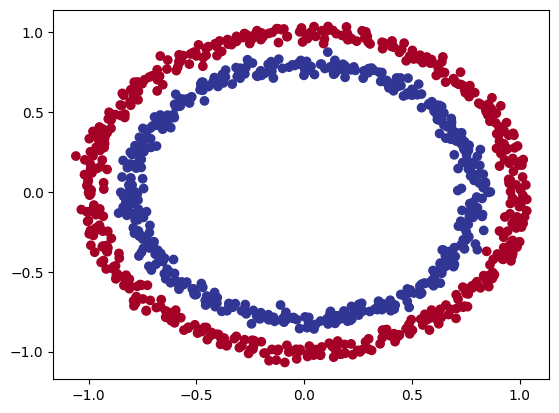

In [61]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [62]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [63]:
len(X),len(y)

(1000, 1000)

In [64]:
# first samples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

## Steps to modelling

In [65]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.18.0'

In [66]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4681 - loss: 4.7926   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4826 - loss: 3.6408 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4843 - loss: 0.7689 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4838 - loss: 0.7144 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4810 - loss: 0.7008 


In [67]:
# Let's try to improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

#### Add an extra-layer

In [68]:
# setrandom seed
tf.random.set_seed(42)

# 1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [69]:
# Evaluate th model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6932  


[0.6932091116905212, 0.5]

## Improving our Model

In [70]:
# set random seed
tf.random.set_seed(42)

# 1. create model (3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [71]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - loss: 0.6912  


[0.6943569183349609, 0.49300000071525574]

To visualize our model's prediction, create `plot_decision_boundary()`, this will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each uniques class falls)

In [72]:
import numpy as np

In [73]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.

  This function was inspired by resource:
  https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [74]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


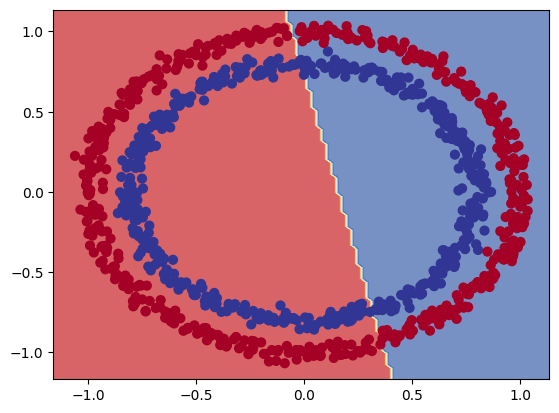

In [75]:
# Check out the predictions our model is makin
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [76]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split into training and test data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Reshape X_reg_train and X_reg_test to have a second dimension
# The new model will expect an input shape of (None, 1)
X_reg_train = tf.expand_dims(X_reg_train, axis=-1)
X_reg_test = tf.expand_dims(X_reg_test, axis=-1)

# Fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [77]:
# Setup random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 290.5899 - mae: 290.5899
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 155.7543 - mae: 155.7543 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 47.8471 - mae: 47.8471 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.9516 - mae: 82.9516 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.7562 - mae: 69.7562 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 43.6551 - mae: 43.6551  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 50.9217 - mae: 50.9217  
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.2552 - mae: 41.2552 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.8970 - mae: 44.8970 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.4267 - mae: 40.4267 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.0806 - mae: 41.0806 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.9192 - mae: 39.9192 
Epoch 13/100
5/5 ━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


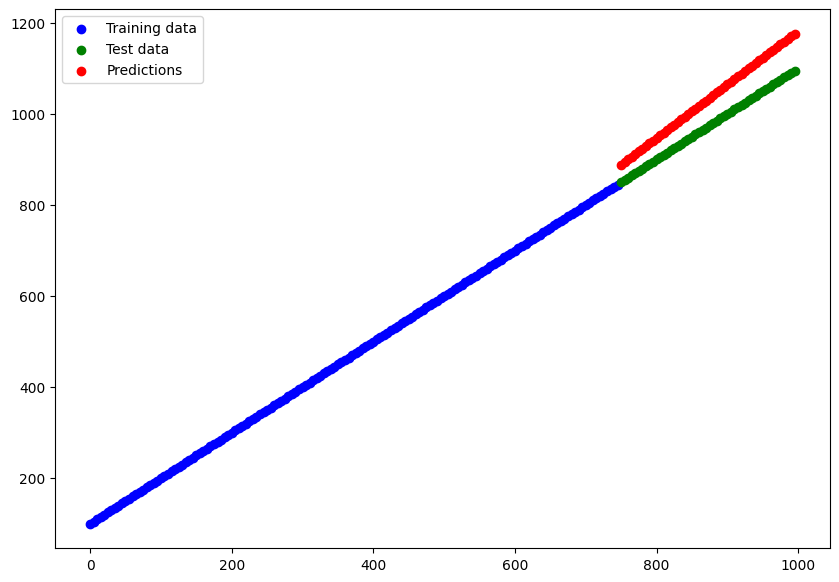

In [78]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-Non-linearity

In [79]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


# Fit the model
model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4919 - loss: 6.0179
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4889 - loss: 6.0119
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4893 - loss: 5.9912
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4863 - loss: 5.9130
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4853 - loss: 5.8935
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 5.8410
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 5.8384
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 5.8371
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4859 - loss: 5.8358
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 5.8346
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 5.8334 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


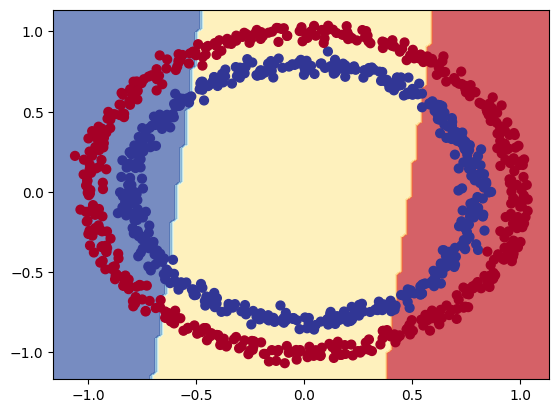

In [80]:
# check decision boundary of model_model_4

plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with non-linear activation function

In [81]:
# Setup random seed
tf.random.set_seed(42)

# Create a model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4937 - loss: 6.6379   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4922 - loss: 6.6281 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4922 - loss: 6.6058 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4922 - loss: 6.6003 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4922 - loss: 6.5993 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4928 - loss: 6.5877
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4967 - loss: 6.5797 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4967 - loss: 6.5783 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4967 - loss: 6.5774
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 6.5766 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 6.5759
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [82]:
# Set random see
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 7.7770
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 6.4086
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 4.0396
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4828 - loss: 2.9607
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4712 - loss: 1.8869
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4481 - loss: 0.9434
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4483 - loss: 0.9090
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4527 - loss: 0.8871
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4457 - loss: 0.8692
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4483 - loss: 0.8541
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4438 - loss: 0.8413
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [83]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6238 - loss: 0.6477


[0.6368007659912109, 0.6549999713897705]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


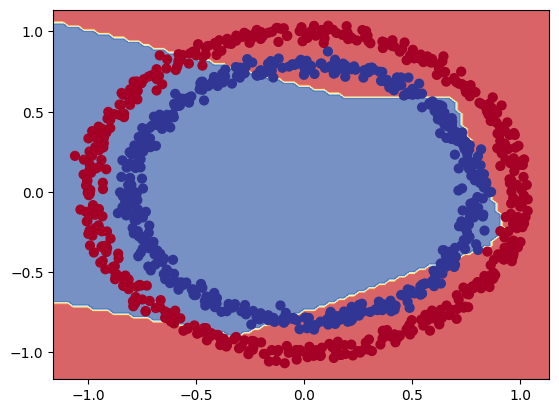

In [84]:
# How do our model look?
plot_decision_boundary(model_6, X, y)

In [85]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

# Fit the model
model_7.fit(X, y, epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5177 - loss: 0.6985
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 0.6969
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4918 - loss: 0.6961
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4670 - loss: 0.6956
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4824 - loss: 0.6952
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4890 - loss: 0.6949
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4770 - loss: 0.6947
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4825 - loss: 0.6945
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4733 - loss: 0.6944
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4797 - loss: 0.6942
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 0.6940
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [86]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.0829  


[0.08072486519813538, 0.9919999837875366]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


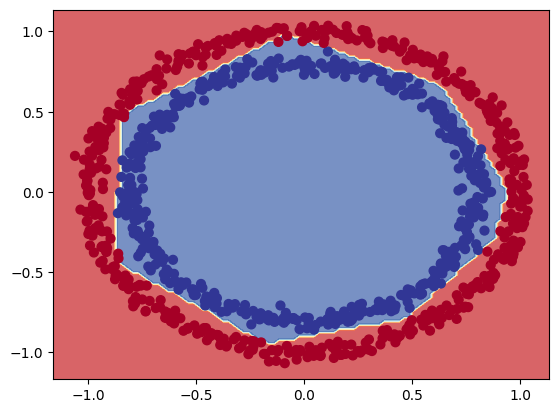

In [87]:
# Visualize the metrics
plot_decision_boundary(model_7, X, y)

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [88]:
# Create a toy tensor (similar to the data we pass into our mmodels)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

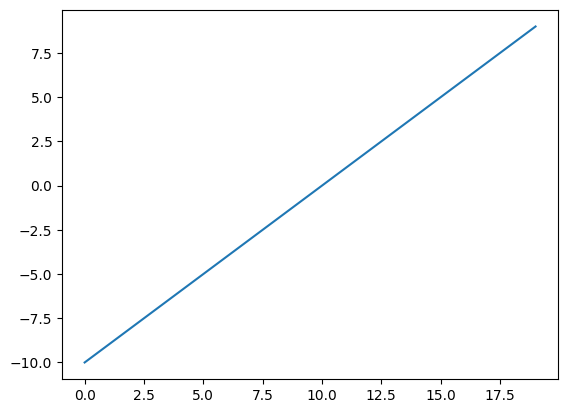

In [89]:
# Visualize our toy tensor
plt.plot(A)

In [90]:
# Let's start by replicating sigmoid: sigmoid(x) = 1/ (1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function in A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

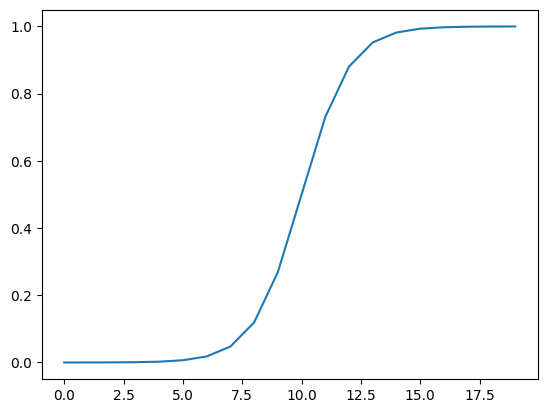

In [91]:
# Plot it transformed by A
plt.plot(sigmoid(A))

In [92]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass the toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

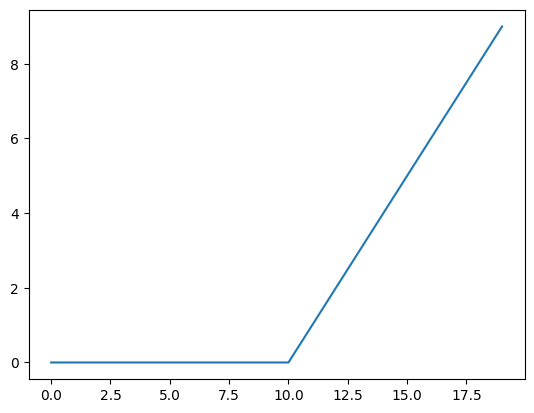

In [93]:
# Plot RELU-modified toy
plt.plot(relu(A));

In [94]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## Evaluating and improving our classification

In [95]:
# Check how many examples we have
len(X)

1000

In [96]:
len(y)

1000

In [97]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [98]:
# Let's recreate a model to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5292 - loss: 0.6923
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5701 - loss: 0.6759 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6218 - loss: 0.6673 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6157 - loss: 0.6557 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6616 - loss: 0.6399 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.6186 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.5924 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.5631 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7770 - loss: 0.5287 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8057 - loss: 0.4975 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8280 - loss: 0.4681 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [99]:
# Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9823 - loss: 0.0511  


[0.04978383705019951, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


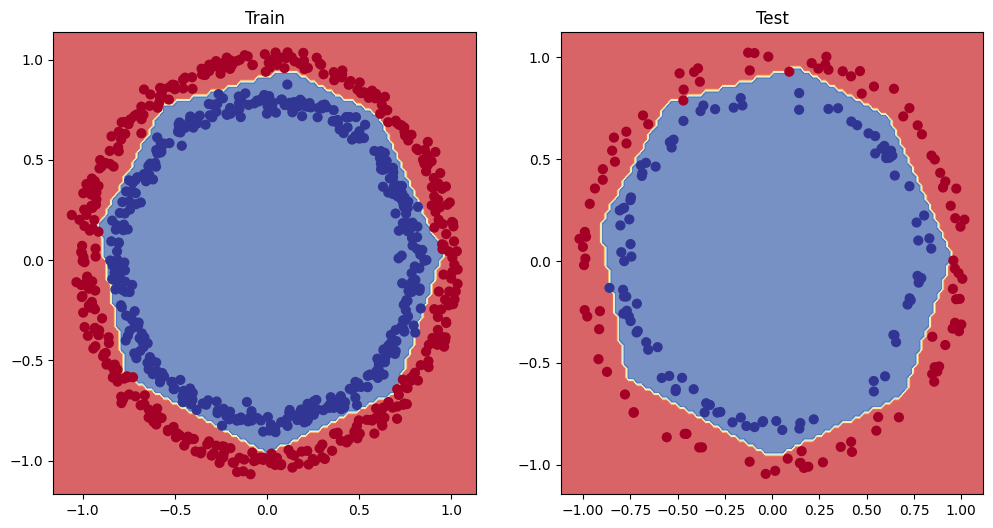

In [100]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [101]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.55000,0.682192
1,0.58750,0.670302
2,0.63250,0.660116
3,0.64625,0.647030
4,0.69750,0.628596
5,0.75375,0.603919
6,0.76250,0.575866
7,0.77625,0.541969
8,0.80500,0.505832
9,0.82875,0.471122


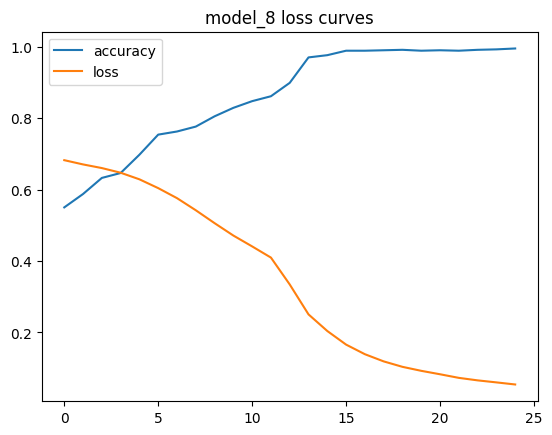

In [102]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")
plt.show();

## Finding the best learning rate
* A learning rate **callback**
* Another model
* A modified loss curves plot

In [103]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Create a learning_rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler)
history_9 =  model_9.fit(X_train,
                       y_train,
                       epochs=100,
                       callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4987 - loss: 0.6986 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4990 - loss: 0.6984 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4990 - loss: 0.6982 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4990 - loss: 0.6979 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5021 - loss: 0.6977 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5017 - loss: 0.6974 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5012 - loss: 0.6970 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5010 - loss: 0.6967 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5014 - loss: 0.6963 - learning_

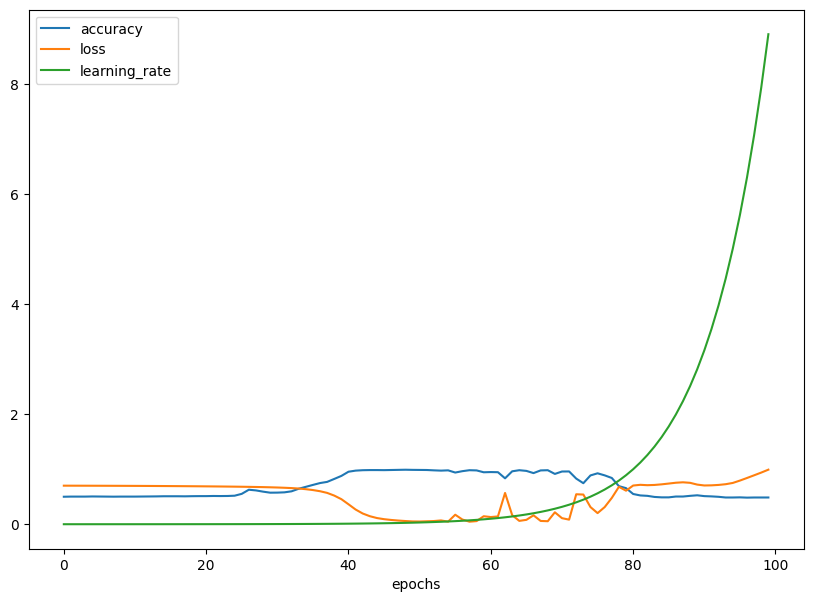

In [104]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

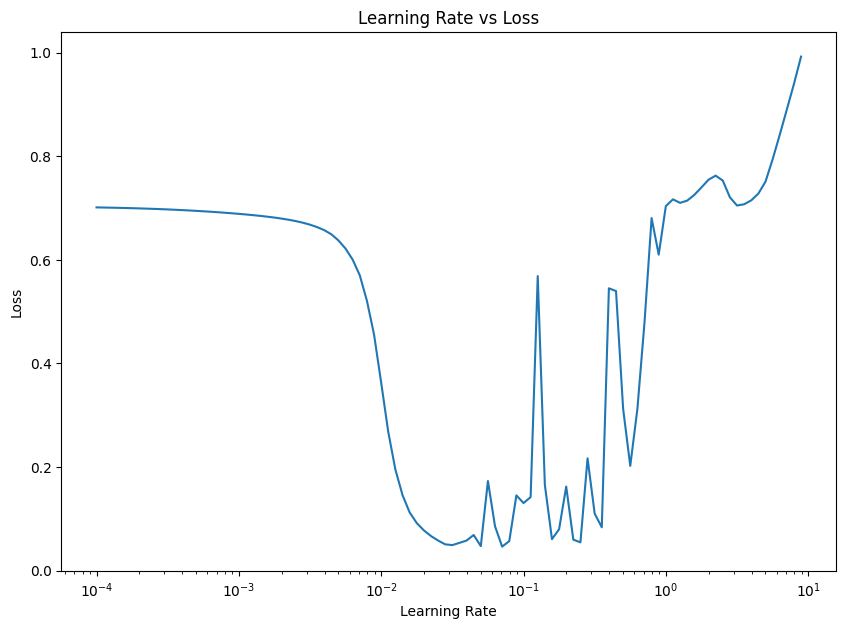

In [105]:
# Plot the learning rate versus loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [106]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning_rate
model_10.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

# Fit the model for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4891 - loss: 0.6979
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - loss: 0.6899 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5129 - loss: 0.6846 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5652 - loss: 0.6733 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6380 - loss: 0.6342 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 0.5855 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7575 - loss: 0.5366 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8172 - loss: 0.4811 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.4305 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8532 - loss: 0.4094 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.3841 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [107]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9818 - loss: 0.1189  


[0.11791964620351791, 0.9750000238418579]

In [108]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9823 - loss: 0.0511 


[0.04978383705019951, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


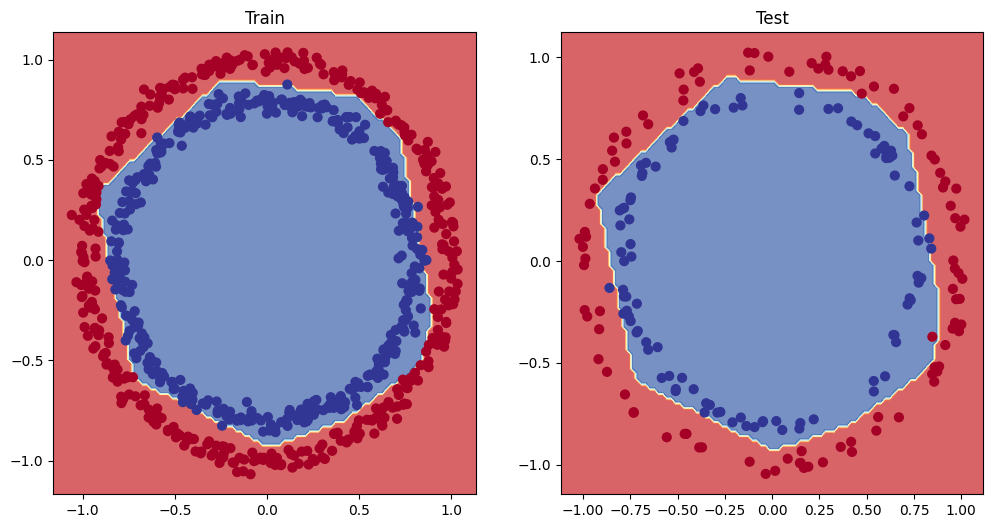

In [109]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report(from scikt-learn)

In [110]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9818 - loss: 0.1189 
Model loss on the test set: 0.11791964620351791
Model accuracy on the test set: 97.50%


## How about Confusion Matrix

In [111]:
# # Create a confusion matrix
from sklearn.metrics import confusion_matrix
#
# # Make predictions
y_preds = model_10.predict(X_test)
#
# # Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [112]:
y_preds[:10]

array([[0.9519189 ],
       [0.8452388 ],
       [0.9519189 ],
       [0.9519189 ],
       [0.48597273],
       [0.0327985 ],
       [0.81636864],
       [0.02163989],
       [0.8567404 ],
       [0.00224133]], dtype=float32)

In [113]:
# Convert predicion probabilities to binary format and view the first 10
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [114]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  4,  95]])

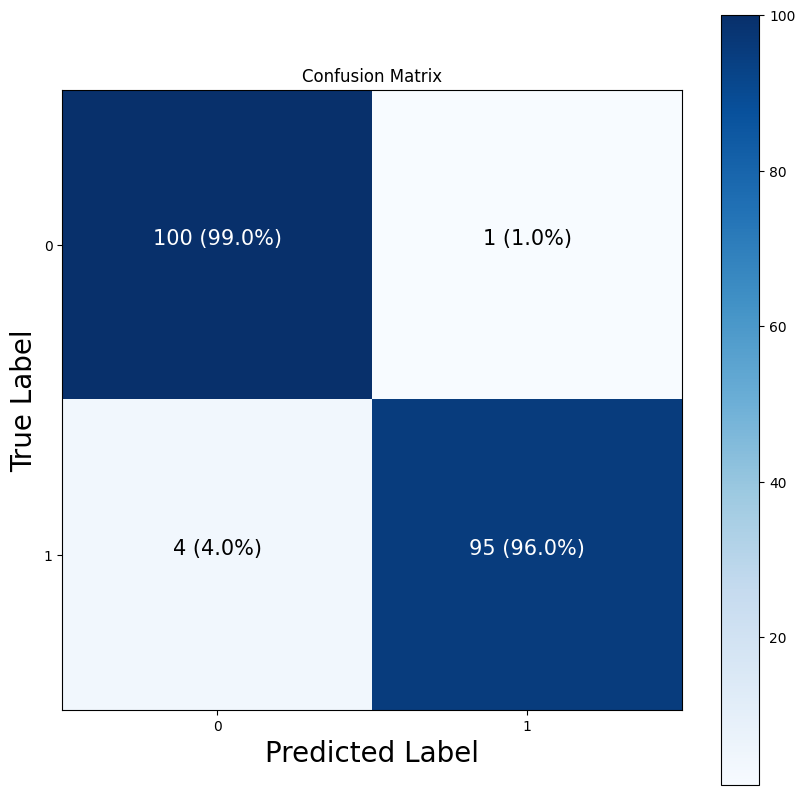

In [115]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [116]:
cm

array([[100,   1],
       [  4,  95]])

In [117]:
cm_norm

array([[0.99009901, 0.00990099],
       [0.04040404, 0.95959596]])

# Working with a larger example (multiclass classification)

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [119]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [122]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  